In [110]:
import time

import matplotlib.pyplot as plt
import numpy as np

In [95]:
class Object:
    def __init__(self, weight, value):
        self.weight = weight
        self.value = value

    def __str__(self) -> str:
        return f"{self.weight=}, {self.value=}"


class Bag:
    def __init__(self, max_weight):
        self.max_weight = max_weight
        self.total_weight = 0
        self.total_value = 0
        self.objects = []

    def __str__(self) -> str:
        objects_str = ", ".join([str(obj) for obj in self.objects])

        return (
            f"{self.max_weight=}, {self.total_weight=}, "
            f"{self.total_value=}, objects=[{objects_str}])"
        )

    def add_object(self, obj: Object) -> None:
        if self.is_addable(obj):
            self.objects.append(obj)
            self.total_weight += obj.weight
            self.total_value += obj.value

    def is_addable(self, obj: Object) -> bool:
        remaining_weight = self.max_weight - self.total_weight
        return obj.weight <= remaining_weight

    def reset(self) -> None:
        self.objects = []
        self.total_weight = 0
        self.total_value = 0

In [106]:
bag = Bag(max_weight=100)
obj_list = [
    Object(weight=np.random.randint(1, 200), value=np.random.randint(1, 100))
    for _ in range(20)
]

In [107]:
def rank_objects(obj_list: list[Object]) -> list[Object]:
    res = []
    for i in range(len(obj_list)):
        res.append((obj_list[i].value / obj_list[i].weight, i, obj_list[i]))

    return sorted(res, reverse=True)

In [108]:
def glouton(bag: Bag, obj_list: list[Object]) -> None:
    ranked_obj = rank_objects(obj_list)
    for _, _, obj in ranked_obj:
        bag.add_object(obj)

        if bag.total_weight >= bag.max_weight:
            return

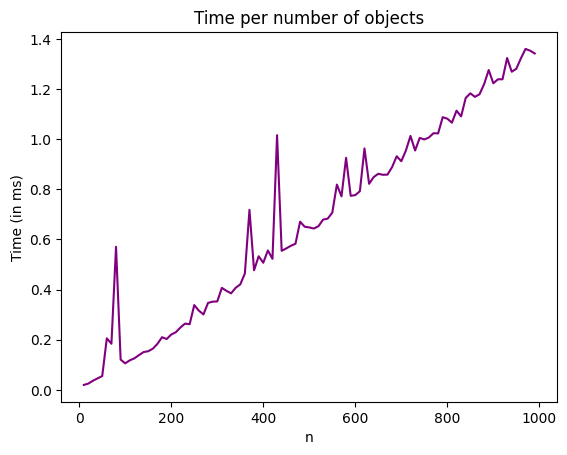

In [142]:
max_object_weight = 10

times = []
ns = list(range(10, 1000, 10))

for n in ns:
    bag = Bag(max_object_weight * n)
    obj_list = [
        Object(
            weight=np.random.randint(1, max_object_weight),
            value=np.random.randint(1, 100),
        )
        for _ in range(n)
    ]

    start = time.time()

    for _ in range(5):
        glouton(bag, obj_list)

    times.append((time.time() - start) * 1000)


plt.plot(
    ns,
    times,
    color="purple",
)
plt.xlabel("n")
plt.ylabel("Time (in ms)")
plt.title("Time per number of objects")
plt.show()